# 分类树

In [0]:
%matplotlib inline  
#帮助画图
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import load_wine

In [0]:
wine = load_wine()

In [0]:
from sklearn.model_selection import train_test_split
Xtrain, Xtest, Ytrain, Ytest = train_test_split(wine.data,wine.target,test_size=0.3)

In [5]:
clf = DecisionTreeClassifier(random_state=0)
rfc = RandomForestClassifier(random_state=0)

clf = clf.fit(Xtrain,Ytrain)
rfc = rfc.fit(Xtrain,Ytrain)

score_c = clf.score(Xtest,Ytest)
score_r = rfc.score(Xtest,Ytest)

print("Single Tree:{}".format(score_c)
        ,"Random Forest:{}".format(score_r)
        )

Single Tree:0.9259259259259259 Random Forest:0.9814814814814815


/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


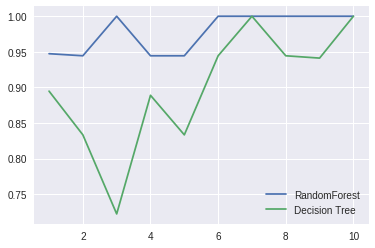

In [6]:
#复习一下交叉验证
#交叉验证：是数据集划分为n分，依次取每一份做测试集，每n-1份做训练集，多次训练模型以观测模型稳定性的方法
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

rfc = RandomForestClassifier(n_estimators=25)
rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10)

clf = DecisionTreeClassifier()
clf_s = cross_val_score(clf,wine.data,wine.target,cv=10)

plt.plot(range(1,11),rfc_s,label = "RandomForest")
plt.plot(range(1,11),clf_s,label = "Decision Tree")
plt.legend()
plt.show()

## 随机森林和决策树在十组交叉验证下的效果对比

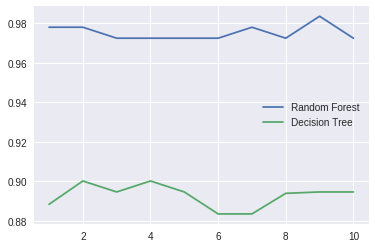

In [7]:
rfc_l = []
clf_l = []
for i in range(10):
    rfc = RandomForestClassifier(n_estimators=25)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    rfc_l.append(rfc_s)
    
    clf = DecisionTreeClassifier()
    clf_s = cross_val_score(clf,wine.data,wine.target,cv=10).mean()
    clf_l.append(clf_s)
plt.plot(range(1,11),rfc_l,label = "Random Forest")
plt.plot(range(1,11),clf_l,label = "Decision Tree")
plt.legend()
plt.show()

## n_estimators的学习曲线

0.9888888888888889 45


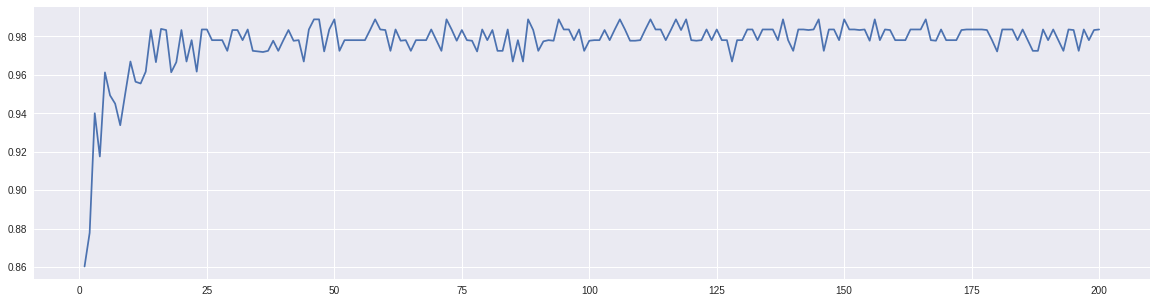

In [8]:
superpa = []
for i in range(200):
    rfc = RandomForestClassifier(n_estimators=i+1,n_jobs=-1)
    rfc_s = cross_val_score(rfc,wine.data,wine.target,cv=10).mean()
    superpa.append(rfc_s)
print(max(superpa),superpa.index(max(superpa)))
plt.figure(figsize=[20,5])
plt.plot(range(1,201),superpa)
plt.show()

##  random_state

随机森林的random_state生成的是固定的森林

In [9]:
import numpy as np
from scipy.special import comb
np.array([comb(25,i)*(0.2**i)*((1-0.2)**(25-i)) for i in range(13,26)]).sum()
# 25颗树，每棵树错误的概率为0.2，则25颗树判错的概率为多少？

0.00036904803455582827

为什么随机森林里的众多树会有不同的判断结果？

In [0]:
rfc = RandomForestClassifier(n_estimators=25,random_state=2)
rfc = rfc.fit(Xtrain, Ytrain)

In [13]:
type(rfc.estimators_[0])

sklearn.tree.tree.DecisionTreeClassifier

In [11]:
#随机森林的重要属性之一：estimators_，查看森林中树的状况
rfc.estimators_[0].random_state

1872583848

In [12]:
for i in range(len(rfc.estimators_)):
    print(rfc.estimators_[i].random_state)

1872583848
794921487
111352301
1853453896
213298710
1922988331
1869695442
2081981515
1805465960
1376693511
1418777250
663257521
878959199
854108747
512264917
515183663
1287007039
2083814687
1146014426
570104212
520265852
1366773364
125164325
786090663
578016451


## bootstrap & oob_score

袋装法正是通过有放回的随机抽样技术来形成不同的训练数据，bootstrap就是用来控制抽样技术的参数

bootstrap参数默认True，代表采用这种有放回的随机抽样技术。通常，这个参数不会被我们设置为False

如果希望用袋外数据来测试，则需要在实例化时就将oob_score这个参数调整为True，训练完毕之后，我们可以用
随机森林的另一个重要属性：oob_score_来查看我们的在袋外数据上测试的结果

In [14]:
#无需划分训练集和测试集
rfc = RandomForestClassifier(n_estimators=25,oob_score=True)
rfc = rfc.fit(wine.data,wine.target)
#重要属性oob_score_
rfc.oob_score_

0.9662921348314607

## 重要属性和接口

In [0]:
#大家可以分别取尝试一下这些属性和接口
rfc = RandomForestClassifier(n_estimators=25)
rfc = rfc.fit(Xtrain, Ytrain)

In [16]:
rfc.score(Xtest,Ytest)

0.9814814814814815

In [17]:
rfc.feature_importances_

array([0.21712325, 0.03608606, 0.01660669, 0.0075598 , 0.03351303,
       0.0483309 , 0.16230165, 0.05118297, 0.01606488, 0.14265971,
       0.049008  , 0.06073031, 0.15883276])

In [18]:
rfc.apply(Xtest)

array([[17,  9,  5, ..., 17,  6,  3],
       [ 3, 13,  1, ..., 19, 15, 10],
       [ 3,  5,  1, ...,  4,  9,  6],
       ...,
       [ 3,  8,  1, ...,  4, 11,  8],
       [18, 14,  8, ..., 11, 15, 19],
       [ 3,  5,  1, ..., 19,  9,  6]])

In [21]:
rfc.apply(Xtest).shape
# 返回每个样本在25颗树上所在叶子节点的索引

(54, 25)

In [19]:
rfc.predict(Xtest)

array([2, 1, 1, 2, 2, 0, 0, 0, 0, 0, 0, 2, 1, 0, 1, 2, 1, 0, 2, 1, 0, 0,
       0, 2, 2, 0, 1, 2, 0, 1, 2, 2, 0, 0, 0, 2, 1, 1, 2, 2, 1, 2, 1, 1,
       2, 1, 2, 0, 1, 2, 2, 1, 0, 1])

In [20]:
rfc.predict_proba(Xtest)

array([[0.  , 0.24, 0.76],
       [0.16, 0.84, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.  , 0.36, 0.64],
       [0.  , 0.36, 0.64],
       [1.  , 0.  , 0.  ],
       [0.8 , 0.2 , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.96, 0.04, 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.32, 0.68],
       [0.12, 0.84, 0.04],
       [0.84, 0.16, 0.  ],
       [0.04, 0.96, 0.  ],
       [0.  , 0.16, 0.84],
       [0.  , 1.  , 0.  ],
       [0.8 , 0.12, 0.08],
       [0.  , 0.2 , 0.8 ],
       [0.12, 0.84, 0.04],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [1.  , 0.  , 0.  ],
       [0.  , 0.28, 0.72],
       [0.  , 0.32, 0.68],
       [0.76, 0.24, 0.  ],
       [0.  , 1.  , 0.  ],
       [0.04, 0.04, 0.92],
       [0.84, 0.12, 0.04],
       [0.16, 0.64, 0.2 ],
       [0.  , 0.44, 0.56],
       [0.  , 0.04, 0.96],
       [1.  , 0.  , 0.  ],
       [0.88, 0.12, 0.  ],
       [1.  , 0.  , 0.  ],
       [0.04, 0.04, 0.92],
       [0.  , 1.  , 0.  ],
 

## Bonus：Bagging的另一个必要条件

袋装法还有另一个必要条件：基分类器的判断准确率至少要超过随机分类器，即时说，基分类器的判断准确率至少要超过50%

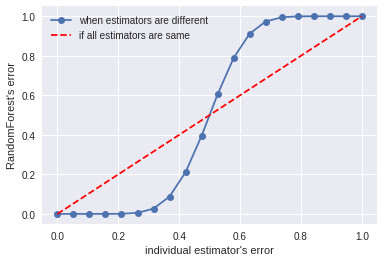

In [22]:
import numpy as np
x = np.linspace(0,1,20)
y = []
for epsilon in np.linspace(0,1,20):
    E = np.array([comb(25,i)*(epsilon**i)*((1-epsilon)**(25-i)) for i in range(13,26)]).sum()
    y.append(E)
plt.plot(x,y,"o-",label="when estimators are different")
plt.plot(x,x,"--",color="red",label="if all estimators are same")
plt.xlabel("individual estimator's error")
plt.ylabel("RandomForest's error")
plt.legend()
plt.show()

# 回归树

In [0]:
from sklearn.datasets import load_boston
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestRegressor
import sklearn
boston = load_boston()

In [24]:
regressor = RandomForestRegressor(n_estimators=100,random_state=0)
cross_val_score(regressor, boston.data, boston.target, cv=10
                ,scoring = "neg_mean_squared_error"
#                 默认R平方
               )

array([-10.72900447,  -5.36049859,  -4.74614178, -20.84946337,
       -12.23497347, -17.99274635,  -6.8952756 , -93.78884428,
       -29.80411702, -15.25776814])

## sklearn中的模型评估指标（打分）列表

In [25]:
# sklearn中的模型评估指标（打分）列表
sorted(sklearn.metrics.SCORERS.keys())

['accuracy',
 'adjusted_mutual_info_score',
 'adjusted_rand_score',
 'average_precision',
 'balanced_accuracy',
 'brier_score_loss',
 'completeness_score',
 'explained_variance',
 'f1',
 'f1_macro',
 'f1_micro',
 'f1_samples',
 'f1_weighted',
 'fowlkes_mallows_score',
 'homogeneity_score',
 'mutual_info_score',
 'neg_log_loss',
 'neg_mean_absolute_error',
 'neg_mean_squared_error',
 'neg_mean_squared_log_error',
 'neg_median_absolute_error',
 'normalized_mutual_info_score',
 'precision',
 'precision_macro',
 'precision_micro',
 'precision_samples',
 'precision_weighted',
 'r2',
 'recall',
 'recall_macro',
 'recall_micro',
 'recall_samples',
 'recall_weighted',
 'roc_auc',
 'v_measure_score']

## 实例：用随机森林回归填补缺失值

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_boston
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

In [27]:
dataset = load_boston()
dataset.data.shape

(506, 13)

In [0]:
#总共506*13=6578个数据
X_full, y_full = dataset.data, dataset.target

In [0]:
n_samples = X_full.shape[0]

In [0]:
n_features = X_full.shape[1]

In [0]:
#首先确定我们希望放入的缺失数据的比例，在这里我们假设是50%，那总共就要有3289个数据缺失
rng = np.random.RandomState(0)
missing_rate = 0.5
n_missing_samples = int(np.floor(n_samples * n_features * missing_rate))
#np.floor向下取整，返回.0格式的浮点数

In [0]:
#所有数据要随机遍布在数据集的各行各列当中，而一个缺失的数据会需要一个行索引和一个列索引
#如果能够创造一个数组，包含3289个分布在0~506中间的行索引，和3289个分布在0~13之间的列索引，那我们就可
#以利用索引来为数据中的任意3289个位置赋空值
#然后我们用0，均值和随机森林来填写这些缺失值，然后查看回归的结果如何

missing_features = rng.randint(0,n_features,n_missing_samples)
# numpy.random.randint(low, high=None, size=None, dtype='l')
# low : int 
# 产生随机数的最小值
# high : int, optional 
# 给随机数设置个上限，即产生的随机数必须小于high
# size : int or tuple of ints, optional 
# 输出的大小，可以是整数，或者元组
missing_samples = rng.randint(0,n_samples,n_missing_samples)

In [33]:
len(missing_features)

3289

In [34]:
len(missing_samples)

3289

In [0]:
#missing_samples = rng.choice(dataset.data.shape[0],n_missing_samples,replace=False)
#我们现在采样了3289个数据，远远超过我们的样本量506，所以我们使用随机抽取的函数randint。但如果我们需要
#的数据量小于我们的样本量506，那我们可以采用np.random.choice来抽样，choice会随机抽取不重复的随机数，
#因此可以帮助我们让数据更加分散，确保数据不会集中在一些行中

In [0]:
X_missing = X_full.copy()
y_missing = y_full.copy()
X_missing[missing_samples,missing_features] = np.nan

In [36]:
X_missing = pd.DataFrame(X_missing)
#转换成DataFrame是为了后续方便各种操作，numpy对矩阵的运算速度快到拯救人生，但是在索引等功能上却不如
#pandas来得好用
X_missing

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,NaN,18.0,NaN,NaN,0.538,NaN,65.2,4.0900,1.0,296.0,NaN,NaN,4.98
1,0.02731,0.0,NaN,0.0,0.469,NaN,78.9,4.9671,2.0,NaN,NaN,396.90,9.14
2,0.02729,NaN,7.07,0.0,NaN,7.185,61.1,NaN,2.0,242.0,NaN,NaN,NaN
3,NaN,NaN,NaN,0.0,0.458,NaN,45.8,NaN,NaN,222.0,18.7,NaN,NaN
4,NaN,0.0,2.18,0.0,NaN,7.147,NaN,NaN,NaN,NaN,18.7,NaN,5.33
5,NaN,0.0,NaN,0.0,NaN,6.430,58.7,6.0622,NaN,222.0,18.7,NaN,5.21
6,NaN,12.5,NaN,0.0,0.524,NaN,66.6,5.5605,NaN,NaN,15.2,NaN,12.43
7,NaN,12.5,NaN,NaN,0.524,NaN,96.1,5.9505,NaN,311.0,15.2,396.90,19.15
8,NaN,NaN,7.87,NaN,0.524,5.631,NaN,6.0821,5.0,311.0,NaN,NaN,29.93
9,0.17004,NaN,7.87,0.0,0.524,NaN,NaN,6.5921,NaN,311.0,NaN,386.71,NaN


In [37]:
X_missing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     306 non-null float64
1     305 non-null float64
2     306 non-null float64
3     303 non-null float64
4     304 non-null float64
5     305 non-null float64
6     321 non-null float64
7     309 non-null float64
8     310 non-null float64
9     309 non-null float64
10    302 non-null float64
11    292 non-null float64
12    317 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [39]:
#使用均值进行填补
from sklearn.impute import SimpleImputer
imp_mean = SimpleImputer(missing_values=np.nan, strategy='mean')
X_missing_mean = imp_mean.fit_transform(X_missing)
pd.DataFrame(X_missing_mean).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [40]:
#使用0进行填补
imp_0 = SimpleImputer(missing_values=np.nan, strategy="constant",fill_value=0)
X_missing_0 = imp_0.fit_transform(X_missing)
pd.DataFrame(X_missing_0).isnull().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [0]:
X_missing_reg = X_missing.copy()

sortindex = np.argsort(X_missing_reg.isnull().sum(axis=0)).values
# 返回从小到大排序所对应的索引

In [71]:
X_missing_reg.isnull().sum(axis=0)

0     200
1     201
2     200
3     203
4     202
5     201
6     185
7     197
8     196
9     197
10    204
11    214
12    189
dtype: int64

In [72]:
sortindex

array([ 6, 12,  8,  7,  9,  0,  2,  1,  5,  4,  3, 10, 11])

### 一次填充

In [0]:
df = X_missing_reg
fillc = df.iloc[:,6]

In [74]:
df.columns != 6

array([ True,  True,  True,  True,  True,  True, False,  True,  True,
        True,  True,  True,  True])

In [0]:
df = pd.concat([df.iloc[:,df.columns != 6],pd.DataFrame(y_full)],axis=1)

In [0]:
df_0 =SimpleImputer(missing_values=np.nan,
                        strategy='constant',fill_value=0).fit_transform(df)

In [77]:
fillc.notnull().sum()

321

In [0]:
#找出我们的训练集和测试集

# 选择非空标签所对应的值
Ytrain = fillc[fillc.notnull()]

Ytest = fillc[fillc.isnull()]
# 我们需要的不是Ytest的值，而是它所带的索引

# 选出非空标签所对应的特征
Xtrain = df_0[Ytrain.index,:]
# Xtrain2 = df_0[fillc.notnull(),:]二者等价
Xtest = df_0[Ytest.index,:]

In [79]:
Ytrain.shape

(321,)

In [80]:
Ytrain.index

Int64Index([  0,   1,   2,   3,   5,   6,   7,  11,  12,  13,
            ...
            495, 496, 497, 498, 499, 500, 501, 502, 503, 504],
           dtype='int64', length=321)

#### 测试

In [81]:
fillc.notnull().sum()

321

In [0]:
Xtrain2 = df_0[fillc.notnull(),:]

In [83]:
Xtest2 = df_0[fillc.isnull(),:]
Xtest2.shape

(185, 13)

In [84]:
type(Xtrain2)

numpy.ndarray

In [85]:
Xtrain2[8]

array([  0.    ,   0.    ,   0.    ,   0.    ,   0.524 ,   5.889 ,
         5.4509,   0.    , 311.    ,  15.2   , 390.5   ,  15.71  ,
        21.7   ])

In [86]:
Xtrain[8]

array([  0.    ,   0.    ,   0.    ,   0.    ,   0.524 ,   5.889 ,
         5.4509,   0.    , 311.    ,  15.2   , 390.5   ,  15.71  ,
        21.7   ])

In [87]:
Xtrain2.shape

(321, 13)

In [88]:
(Xtrain2-Xtrain).sum()

0.0

#### 填充

In [0]:
#用随机森林回归来填补缺失值
rfc = RandomForestRegressor(n_estimators=100)
rfc = rfc.fit(Xtrain, Ytrain)
Ypredict = rfc.predict(Xtest)

In [90]:
len(Ypredict)

185

In [91]:
X_missing_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     306 non-null float64
1     305 non-null float64
2     306 non-null float64
3     303 non-null float64
4     304 non-null float64
5     305 non-null float64
6     321 non-null float64
7     309 non-null float64
8     310 non-null float64
9     309 non-null float64
10    302 non-null float64
11    292 non-null float64
12    317 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


In [92]:
#将填补好的特征返回到我们的原始的特征矩阵中
X_missing_reg.loc[X_missing_reg.iloc[:,6].isnull(),6] = Ypredict
X_missing_reg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
0     306 non-null float64
1     305 non-null float64
2     306 non-null float64
3     303 non-null float64
4     304 non-null float64
5     305 non-null float64
6     506 non-null float64
7     309 non-null float64
8     310 non-null float64
9     309 non-null float64
10    302 non-null float64
11    292 non-null float64
12    317 non-null float64
dtypes: float64(13)
memory usage: 51.5 KB


### 循环全部填充

In [93]:
X_missing_reg2 = X_missing.copy()

sortindex = np.argsort(X_missing_reg2.isnull().sum(axis=0)).values
X_missing_reg2.isnull().sum(axis=0)

0     200
1     201
2     200
3     203
4     202
5     201
6     185
7     197
8     196
9     197
10    204
11    214
12    189
dtype: int64

In [0]:
for i in sortindex:
    #构建我们的新特征矩阵和新标签
    df = X_missing_reg2
    fillc = df.iloc[:,i]
    df = pd.concat([df.iloc[:,df.columns != i],pd.DataFrame(y_full)],axis=1)
    
    #在新特征矩阵中，对含有缺失值的列，进行0的填补
    df_0 =SimpleImputer(missing_values=np.nan,
                        strategy='constant',fill_value=0).fit_transform(df)
    
    #找出我们的训练集和测试集
    Ytrain = fillc[fillc.notnull()]
    Ytest = fillc[fillc.isnull()]
    Xtrain = df_0[Ytrain.index,:]
    Xtest = df_0[Ytest.index,:]
    
    #用随机森林回归来填补缺失值
    rfc = RandomForestRegressor(n_estimators=100)
    rfc = rfc.fit(Xtrain, Ytrain)
    Ypredict = rfc.predict(Xtest)
    
    #将填补好的特征返回到我们的原始的特征矩阵中
    X_missing_reg2.loc[X_missing_reg2.iloc[:,i].isnull(),i] = Ypredict

In [95]:
#对所有数据进行建模，取得MSE结果
X = [X_full,X_missing_mean,X_missing_0,X_missing_reg2]
mse = []
std = []
for x in X:
    estimator = RandomForestRegressor(random_state=0, n_estimators=100)
    scores = cross_val_score(estimator,x,y_full,scoring='neg_mean_squared_error',
                            cv=5).mean()
    mse.append(scores * -1)
mse

[21.62860460743544, 40.84405476955929, 49.50657028893417, 19.47990619763152]

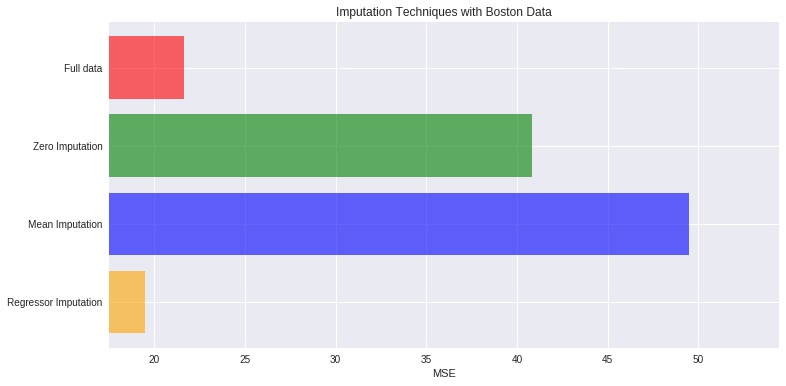

In [97]:
x_labels = ['Full data',
            'Zero Imputation',
            'Mean Imputation',
            'Regressor Imputation']
colors = ['r', 'g', 'b', 'orange']
plt.figure(figsize=(12, 6))
ax = plt.subplot(111)#添加子图
for i in np.arange(len(mse)):
    ax.barh(i, mse[i],color=colors[i], alpha=0.6, align='center')
#     横向条形图
ax.set_title('Imputation Techniques with Boston Data')
ax.set_xlim(left=np.min(mse) * 0.9,
            right=np.max(mse) * 1.1)
ax.set_yticks(np.arange(len(mse)))
ax.set_xlabel('MSE')
ax.invert_yaxis()
#y轴反向

ax.set_yticklabels(x_labels)
plt.show()

# 实例：随机森林在乳腺癌数据上的调参

In [0]:
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [99]:
data = load_breast_cancer()
data
data.data.shape
data.target
#可以看到，乳腺癌数据集有569条记录，30个特征，单看维度虽然不算太高，但是样本量非常少。
# 过拟合的情况可能存在。

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [100]:
rfc = RandomForestClassifier(n_estimators=100,random_state=90)
score_pre = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score_pre
#这里可以看到，随机森林在乳腺癌数据上的表现本就还不错，在现实数据集上，基本上不可能什么都不调就看到95%以
# 上的准确率

0.9666925935528475

## n_estimators

0.9684480598046841 41


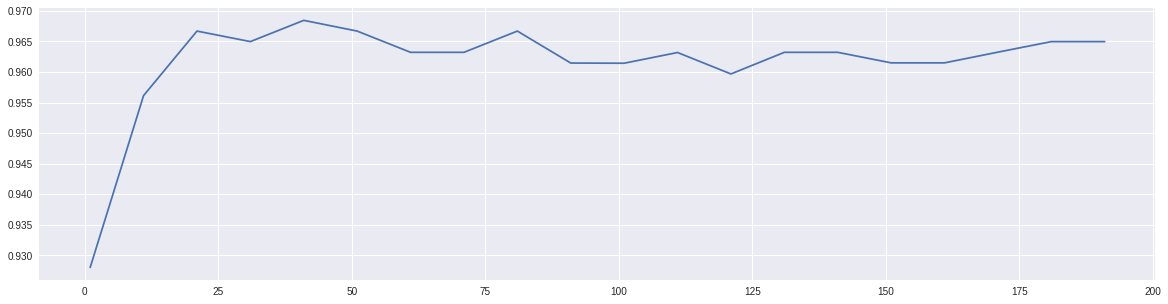

In [101]:
scorel = []
for i in range(0,200,10):
    rfc = RandomForestClassifier(n_estimators=i+1,
                                    n_jobs=-1,
                                    random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),(scorel.index(max(scorel))*10)+1)
plt.figure(figsize=[20,5])
plt.plot(range(1,201,10),scorel)
plt.show()
#list.index([object])
#返回这个object在列表list中的索引

0.9719568317345088 39


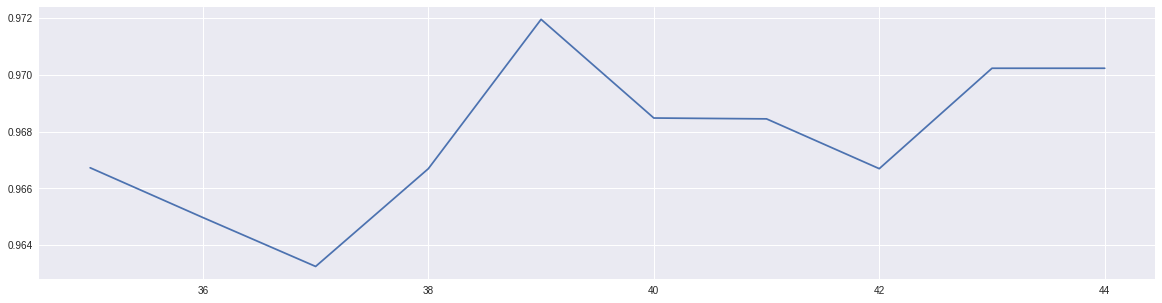

In [102]:
scorel = []
for i in range(35,45):
    rfc = RandomForestClassifier(n_estimators=i,
                                n_jobs=-1,
                                random_state=90)
    score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
    scorel.append(score)
print(max(scorel),([*range(35,45)][scorel.index(max(scorel))]))
plt.figure(figsize=[20,5])
plt.plot(range(35,45),scorel)
plt.show()

# 有一些参数是没有参照的，很难说清一个范围，这种情况下我们使用学习曲线，看趋势
# 从曲线跑出的结果中选取一个更小的区间，再跑曲线

## max_depth

In [103]:
#调整max_depth
param_grid = {'max_depth':np.arange(1, 20, 1)}
# 一般根据数据的大小来进行一个试探，乳腺癌数据很小，所以可以采用1~10，或者1~20这样的试探
# 但对于像digit recognition那样的大型数据来说，我们应该尝试30~50层深度（或许还不足够
# 更应该画出学习曲线，来观察深度对模型的影响
rfc = RandomForestClassifier(n_estimators=39
                            ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_depth': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [104]:
GS.best_params_

{'max_depth': 11}

In [105]:
GS.best_score_

0.9718804920913884

## max_features

In [106]:
# 调整max_features
param_grid = {'max_features':np.arange(5,30,1)}
# """
# max_features是唯一一个即能够将模型往左（低方差高偏差）推，也能够将模型往右（高方差低偏差）推的参数。我
# 们需要根据调参前，模型所在的位置（在泛化误差最低点的左边还是右边）来决定我们要将max_features往哪边调。
# 现在模型位于图像左侧，我们需要的是更高的复杂度，因此我们应该把max_features往更大的方向调整，可用的特征
# 越多，模型才会越复杂。max_features的默认最小值是sqrt(n_features)，因此我们使用这个值作为调参范围的
# 最小值。
# """
rfc = RandomForestClassifier(n_estimators=39
                            ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'max_features': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [107]:
GS.best_params_

{'max_features': 5}

In [108]:
GS.best_score_

0.9718804920913884

## min_samples_leaf

In [109]:
#调整min_samples_leaf
param_grid={'min_samples_leaf':np.arange(1, 1+10, 1)}

#对于min_samples_split和min_samples_leaf,一般是从他们的最小值开始向上增加10或20
#面对高维度高样本量数据，如果不放心，也可以直接+50，对于大型数据，可能需要200~300的范围
#如果调整的时候发现准确率无论如何都上不来，那可以放心大胆调一个很大的数据，大力限制模型的复杂度

rfc = RandomForestClassifier(n_estimators=39
                            ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_leaf': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [110]:
GS.best_params_

{'min_samples_leaf': 1}

In [111]:
GS.best_score_

0.9718804920913884

## min_samples_split

In [112]:
#调整min_samples_split
param_grid={'min_samples_split':np.arange(2, 2+20, 1)}
rfc = RandomForestClassifier(n_estimators=39
                            ,random_state=90
                            )
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'min_samples_split': array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [113]:
GS.best_params_

{'min_samples_split': 2}

In [114]:
GS.best_score_

0.9718804920913884

## Criterion

In [115]:
#调整Criterion
param_grid = {'criterion':['gini', 'entropy']}
rfc = RandomForestClassifier(n_estimators=39
,random_state=90
)
GS = GridSearchCV(rfc,param_grid,cv=10)
GS.fit(data.data,data.target)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=39, n_jobs=None,
            oob_score=False, random_state=90, verbose=0, warm_start=False),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid={'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, return_train_score='warn',
       scoring=None, verbose=0)

In [116]:
GS.best_params_

{'criterion': 'gini'}

In [117]:
GS.best_score_

0.9718804920913884

In [118]:
rfc = RandomForestClassifier(n_estimators=39,random_state=90)
score = cross_val_score(rfc,data.data,data.target,cv=10).mean()
score

0.9719568317345088

In [119]:
score - score_pre

0.005264238181661218

In [120]:
rfc2 = RandomForestClassifier(n_estimators=68
                            ,random_state=90
                            ,criterion="gini"
                            ,min_samples_split=8
                            ,min_samples_leaf=1
                            ,max_depth=12
                            ,max_features=2
                            ,max_leaf_nodes=36
                            )
score2 = cross_val_score(rfc2,data.data,data.target,cv=10).mean()
score2

0.964905798980209